# <span style="color:darkblue">05-Plotting</span>

In this notebook, we will create plots for all the conditions and RNAs in our dataset. Some of these figure were also used in the publication linked to this dataset. 

## 5.1 - Load libraries

In [1]:
from glob import glob
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
# adjust plotting settings
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 7}

matplotlib.rc('font', **font)

In [3]:
# paths
root_dir = '../data/restructured_data/replicate1'

In [5]:
files = glob(f"{root_dir}/Results/*.csv")

dfs = []
for file in files:
    print(f'loading {file} ...')
    filename=Path(file).stem
    df = pd.read_csv(file)
    df['strain'], df['mRNA'], df['condition'], df['channel'], df['fov'] = filename.split('_')
    dfs.append(df)
    print('... done')
df = pd.concat(dfs).reset_index()

loading ../data/restructured_data/replicate1/Results\CET111_CLB2Q670_SPIDER37_CY5_02.csv ...
... done
loading ../data/restructured_data/replicate1/Results\CET111_CLB2Q670_TSB30_CY5_03.csv ...
... done
loading ../data/restructured_data/replicate1/Results\CET111_CLB2Q670_TSB37_CY5_10.csv ...
... done
loading ../data/restructured_data/replicate1/Results\CET111_EFG1Q670_SPIDER37_CY5_01.csv ...
... done
loading ../data/restructured_data/replicate1/Results\CET111_EFG1Q670_TSB30_CY5_08.csv ...
... done
loading ../data/restructured_data/replicate1/Results\CET111_EFG1Q670_TSB37_CY5_11.csv ...
... done
loading ../data/restructured_data/replicate1/Results\CET111_HWP1CAL610_SPIDER37_CY35_01.csv ...
... done
loading ../data/restructured_data/replicate1/Results\CET111_HWP1CAL610_SPIDER37_CY35_02.csv ...
... done
loading ../data/restructured_data/replicate1/Results\CET111_HWP1CAL610_TSB30_CY35_03.csv ...
... done
loading ../data/restructured_data/replicate1/Results\CET111_HWP1CAL610_TSB30_CY35_08.csv

In [6]:
df

,index,Unnamed: 0,label,bbox-0,bbox-1,bbox-2,bbox-3,area,eccentricity,spots_per_cell,...,decomposed_RNAs,tx_per_cell,nascent_RNAs,nuclei,total_RNAs_per_cell,strain,mRNA,condition,channel,fov
0,0,0,1,0,160,36,212,1501,0.705312,0,...,0,0,0,1,0,CET111,CLB2Q670,SPIDER37,CY5,02
1,1,1,2,0,208,27,243,809,0.677395,0,...,0,0,0,0,0,CET111,CLB2Q670,SPIDER37,CY5,02
2,2,2,3,0,243,46,287,1691,0.569907,0,...,0,0,0,0,0,CET111,CLB2Q670,SPIDER37,CY5,02
3,3,3,4,0,283,27,309,566,0.406649,2,...,0,0,0,0,2,CET111,CLB2Q670,SPIDER37,CY5,02
4,4,4,5,0,1163,53,1228,2793,0.518867,5,...,0,0,0,1,5,CET111,CLB2Q670,SPIDER37,CY5,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,92,92,93,1956,1643,2018,1838,8750,0.965616,0,...,0,0,0,1,0,CET111,HWP1CAL610,TSB37,CY35,11
3174,93,93,94,1904,1601,1992,1674,4365,0.763429,0,...,0,0,0,1,0,CET111,HWP1CAL610,TSB37,CY35,11
3175,94,94,95,1354,1846,1456,1978,7660,0.906977,0,...,0,0,0,1,0,CET111,HWP1CAL610,TSB37,CY35,11
3176,95,95,96,1010,1547,1075,1628,3889,0.734899,0,...,0,0,0,1,0,CET111,HWP1CAL610,TSB37,CY35,11


In [7]:
# store variables:

mRNAs = df['mRNA'].unique()
conditions = ['TSB30','TSB37','SPIDER37']
channels = df['channel'].unique()

## 5.1 - Histograms of mRNA counts and eccentricity

In [8]:
data1=df[(df['condition']=='TSB30')    &(df['mRNA']==   'CLB2Q670') & (df['channel']==   'CY5')]
data2=df[(df['condition']=='TSB37')    &(df['mRNA']==   'CLB2Q670') & (df['channel']==   'CY5')]
data3=df[(df['condition']=='SPIDER37') &(df['mRNA']==   'CLB2Q670') & (df['channel']==   'CY5')]

In [9]:
print(data1.groupby(['total_RNAs_per_cell'])['total_RNAs_per_cell'].count())
print(data2.groupby(['total_RNAs_per_cell'])['total_RNAs_per_cell'].count())
print(data3.groupby(['total_RNAs_per_cell'])['total_RNAs_per_cell'].count())

total_RNAs_per_cell
0     15
1     16
2     11
3     23
4     20
5     20
6     31
7     23
8     24
9     15
10    18
11    11
12    10
13     9
14     7
15     6
16     3
17     1
18     7
19     2
22     1
25     2
26     2
28     1
Name: total_RNAs_per_cell, dtype: int64
total_RNAs_per_cell
0     12
1     16
2     20
3     24
4     22
5     19
6     11
7     13
8      7
9      8
10     5
11     7
12    11
13     3
14     2
15     2
16     1
17     2
18     2
19     2
22     1
23     1
24     1
25     1
26     2
30     1
36     1
Name: total_RNAs_per_cell, dtype: int64
total_RNAs_per_cell
0     105
1      75
2      60
3      50
4      25
5      26
6      17
7      17
8       5
9       7
11      2
12      3
14      1
Name: total_RNAs_per_cell, dtype: int64


C:\Users\asus5\AppData\Local\Temp\ipykernel_25660\201962446.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY5')& (df['mRNA']=='CLB2Q670')], x='total_RNAs_per_cell',ax=axes[row, col],binwidth=1, palette='deep')
C:\Users\asus5\AppData\Local\Temp\ipykernel_25660\201962446.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY5')& (df['mRNA']=='CLB2Q670')], x='total_RNAs_per_cell',ax=axes[row, col],binwidth=1, palette='deep')
C:\Users\asus5\AppData\Local\Temp\ipykernel_25660\201962446.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY5')& (df['mRNA']=='CLB2Q670')], x='total_RNAs_per_cell',ax=axes[row, col],binwidth=1, palette='deep')


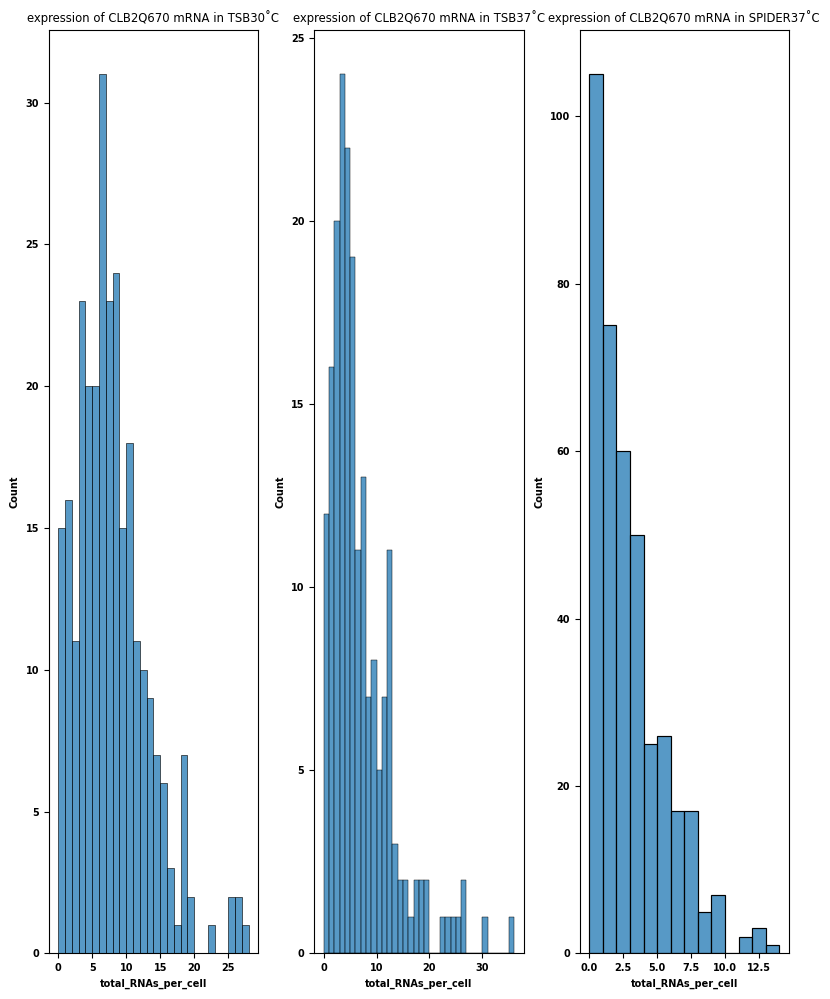

In [10]:
channels = ['CY5']
mRNA = 'CLB2Q670'
conditions = ['TSB30','TSB37','SPIDER37']
nrows = len(channels)
ncols = len(conditions)

figure, axes= plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,10))
axes = np.array(axes).reshape(nrows, ncols)
for row, channel in enumerate(channels):
    for col, condition in enumerate(conditions):
        sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY5')& (df['mRNA']=='CLB2Q670')], x='total_RNAs_per_cell',ax=axes[row, col],binwidth=1, palette='deep')  
        #axes[row,col].set_xlim(0,40)
        #axes[row,col].set_ylim(0,70)
        
        axes[row,col].set_title(f'expression of {mRNA} mRNA in {condition}˚C')
        
plt.tight_layout()
#plt.savefig('FV-expression_CLB2_different_conditions_barplot.svg')
    

In [11]:
data4=df[(df['condition']=='TSB30')    &(df['mRNA']==   'EFG1Q670') & (df['channel']==   'CY5')]
data5=df[(df['condition']=='TSB37')    &(df['mRNA']==   'EFG1Q670') & (df['channel']==   'CY5')]
data6=df[(df['condition']=='SPIDER37') &(df['mRNA']==   'EFG1Q670') & (df['channel']==   'CY5')]

In [12]:
print(data4.groupby(['total_RNAs_per_cell'])['total_RNAs_per_cell'].count())
print(data5.groupby(['total_RNAs_per_cell'])['total_RNAs_per_cell'].count())
print(data6.groupby(['total_RNAs_per_cell'])['total_RNAs_per_cell'].count())

total_RNAs_per_cell
0      2
1      6
2      6
3      9
4     12
5     13
6     14
7     13
8     22
9     27
10    21
11    22
12    28
13    16
14    17
15    25
16    13
17    12
18    10
19    12
20    10
21    13
22     6
23     3
24     7
25     6
26    11
27     5
28     2
29     5
30     3
31     1
32     5
33     2
35     1
36     1
37     2
39     3
40     2
41     1
43     1
44     1
45     1
46     1
47     1
51     1
60     1
63     1
Name: total_RNAs_per_cell, dtype: int64
total_RNAs_per_cell
0     4
2     3
3     2
4     2
5     4
6     2
7     6
8     3
9     1
10    2
11    6
12    3
13    1
14    7
15    1
16    5
17    7
18    3
19    2
20    3
21    2
22    2
23    3
25    3
26    2
28    2
29    3
30    1
31    3
32    2
35    1
36    1
38    1
43    1
50    1
63    1
73    1
Name: total_RNAs_per_cell, dtype: int64
total_RNAs_per_cell
0     14
1     13
2     18
3     14
4     14
5     18
6     17
7     20
8      5
9     15
10     7
11     7
12     3
13     9
14    

C:\Users\asus5\AppData\Local\Temp\ipykernel_25660\3464757157.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY5')& (df['mRNA']=='EFG1Q670')], x='total_RNAs_per_cell',ax=axes[row, col],binwidth=1, palette='deep')
C:\Users\asus5\AppData\Local\Temp\ipykernel_25660\3464757157.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY5')& (df['mRNA']=='EFG1Q670')], x='total_RNAs_per_cell',ax=axes[row, col],binwidth=1, palette='deep')
C:\Users\asus5\AppData\Local\Temp\ipykernel_25660\3464757157.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY5')& (df['mRNA']=='EFG1Q670')], x='total_RNAs_per_cell',ax=axes[row, col],binwidth=1, palette='deep')


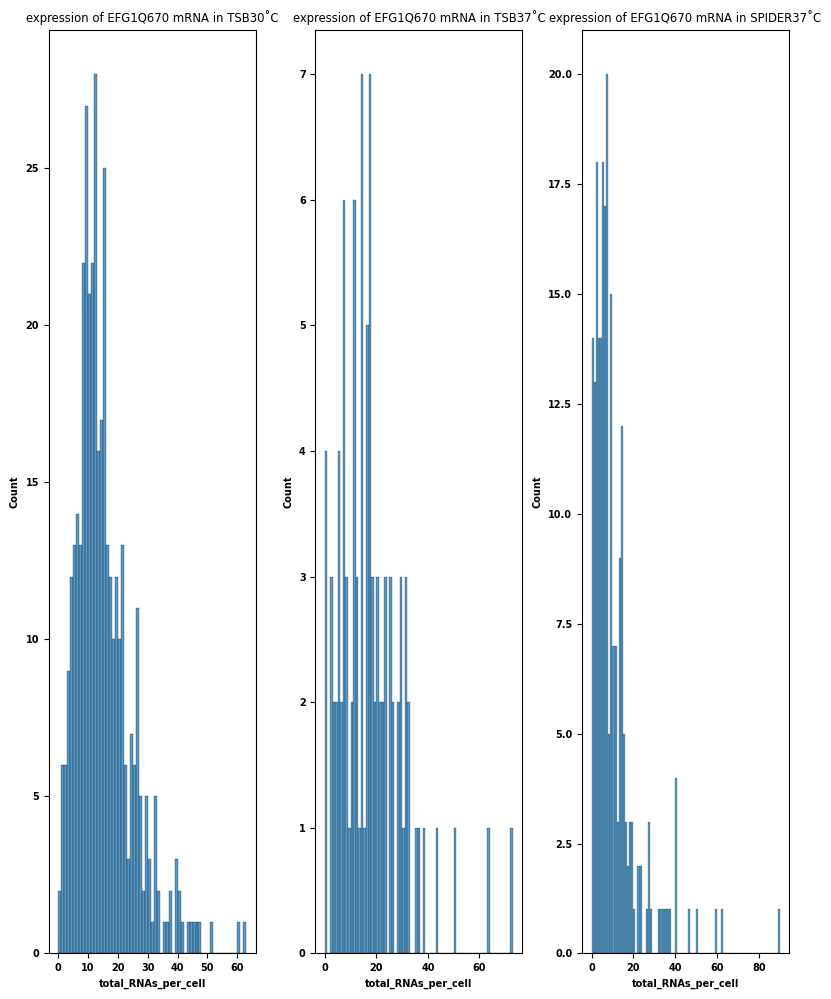

In [13]:
channels = ['CY5']
mRNA = 'EFG1Q670'

nrows = len(channels)
ncols = len(conditions)

figure, axes= plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,10))
axes = np.array(axes).reshape(nrows, ncols)
for row, channel in enumerate(channels):
    for col, condition in enumerate(conditions):
        sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY5')& (df['mRNA']=='EFG1Q670')], x='total_RNAs_per_cell',ax=axes[row, col],binwidth=1, palette='deep')  
        #axes[row,col].set_xlim(0,40)
        #axes[row,col].set_ylim(0,70)
        
        axes[row,col].set_title(f'expression of {mRNA} mRNA in {condition}˚C')
        
plt.tight_layout()
#plt.savefig('FV-expression_CLB2_different_conditions_barplot.svg')

In [14]:
data7=df[(df['condition']=='TSB30')    &(df['mRNA']==   'HWP1CAL610') & (df['channel']==   'CY35')]
data8=df[(df['condition']=='TSB37')    &(df['mRNA']==   'HWP1CAL610') & (df['channel']==   'CY35')]
data9=df[(df['condition']=='SPIDER37') &(df['mRNA']==   'HWP1CAL610') & (df['channel']==   'CY35')]

In [15]:
print(data7.groupby(['total_RNAs_per_cell'])['total_RNAs_per_cell'].count())
print(data8.groupby(['total_RNAs_per_cell'])['total_RNAs_per_cell'].count())
print(data9.groupby(['total_RNAs_per_cell'])['total_RNAs_per_cell'].count())

total_RNAs_per_cell
0    622
1     39
2      3
3      9
5      1
6      1
Name: total_RNAs_per_cell, dtype: int64
total_RNAs_per_cell
0      277
1        6
2        3
4        2
5        1
7        1
10       1
22       1
198      1
309      1
Name: total_RNAs_per_cell, dtype: int64
total_RNAs_per_cell
0       449
1        82
2        26
3         9
4        12
5         5
6         3
7         2
8         1
9         6
10        2
11        2
12        2
15        1
18        1
24        1
25        1
26        1
29        1
35        1
54        1
55        1
78        1
87        1
89        1
97        1
129       1
321       1
390       1
597       1
841       1
1185      1
Name: total_RNAs_per_cell, dtype: int64


C:\Users\asus5\AppData\Local\Temp\ipykernel_25660\3917812739.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY35')], x='total_RNAs_per_cell',ax=axes[row, col],bins=20, palette='viridis')
C:\Users\asus5\AppData\Local\Temp\ipykernel_25660\3917812739.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY35')], x='total_RNAs_per_cell',ax=axes[row, col],bins=20, palette='viridis')
C:\Users\asus5\AppData\Local\Temp\ipykernel_25660\3917812739.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY35')], x='total_RNAs_per_cell',ax=axes[row, col],bins=20, palette='viridis')


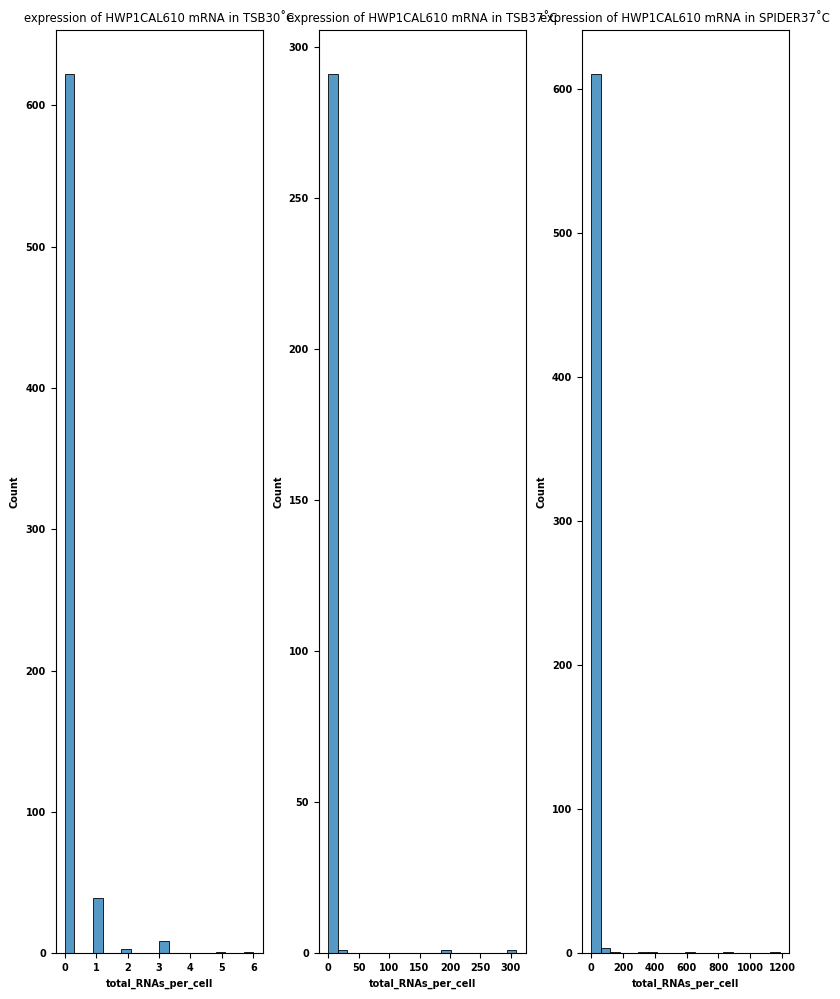

In [16]:
channels = ['CY35']
mRNA = 'HWP1CAL610'
conditions = ['TSB30','TSB37','SPIDER37']
nrows = len(channels)
ncols = len(conditions)

figure, axes= plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,10))
axes = np.array(axes).reshape(nrows, ncols)

for row, channel in enumerate(channels):
    for col, condition in enumerate(conditions):
        
        sns.histplot(data=df[(df['condition']==condition) & (df['channel']=='CY35')], x='total_RNAs_per_cell',ax=axes[row, col],bins=20, palette='viridis')  
        #axes[row,col].set_xlim(0,20)
        #axes[row,col].set_ylim(0,260)
        
        axes[row,col].set_title(f'expression of {mRNA} mRNA in {condition}˚C')
plt.tight_layout() 
#plt.savefig('FV-expression_HWP1_different_conditions_barplot.svg')

Text(0.5, 1.0, 'CLB2 mRNA')

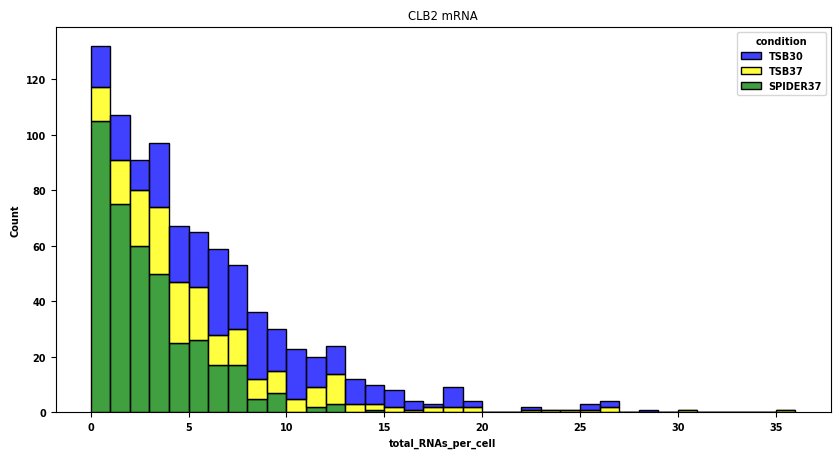

In [17]:
figure,ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(
    data=df[(df['channel']=='CY5')& (df['mRNA']=='CLB2Q670')], x='total_RNAs_per_cell',hue='condition',hue_order=['TSB30', 'TSB37', 'SPIDER37'], binwidth=1, multiple="stack",ax=ax, 
    palette=['blue','yellow', 'green'])
#axes[row,col].set_xlim(0,40)
#axes[row,col].set_ylim(0,90)
ax.set_title('CLB2 mRNA')  

#plt.savefig('FV_CLB2Q670_histplot1.svg')

Text(0.5, 1.0, 'CLB2 mRNA')

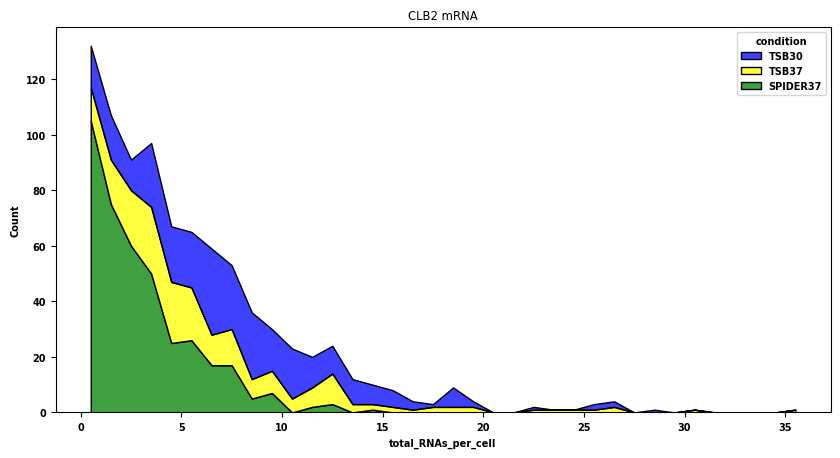

In [18]:
figure,ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(
    data=df[(df['channel']=='CY5')& (df['mRNA']=='CLB2Q670')], x='total_RNAs_per_cell',multiple="stack",hue='condition',hue_order=['TSB30', 'TSB37', 'SPIDER37'], binwidth=1, ax=ax ,palette=['blue','yellow', 'green'], 
    element="poly")

ax.set_title('CLB2 mRNA')  

#plt.savefig('FV_CLB2Q670_polyplot1.svg')

Text(0.5, 1.0, 'EFG1 mRNA')

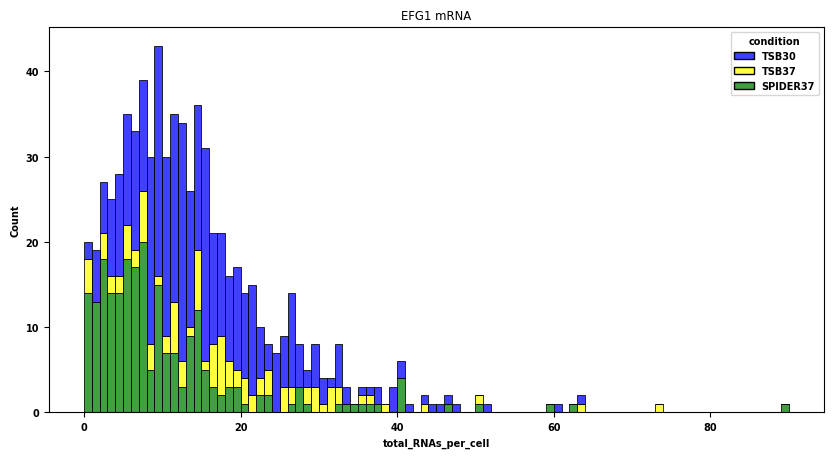

In [19]:
figure,ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(
    data=df[(df['channel']=='CY5')& (df['mRNA']=='EFG1Q670')], x='total_RNAs_per_cell',hue='condition',hue_order=['TSB30', 'TSB37', 'SPIDER37'], binwidth=1, multiple="stack",ax=ax, 
    palette=['blue','yellow', 'green'])
#axes[row,col].set_xlim(0,40)
#axes[row,col].set_ylim(0,90)
ax.set_title('EFG1 mRNA')  

#plt.savefig('FV_CLB2Q670_histplot1.svg')

Text(0.5, 1.0, 'EFG1 mRNA')

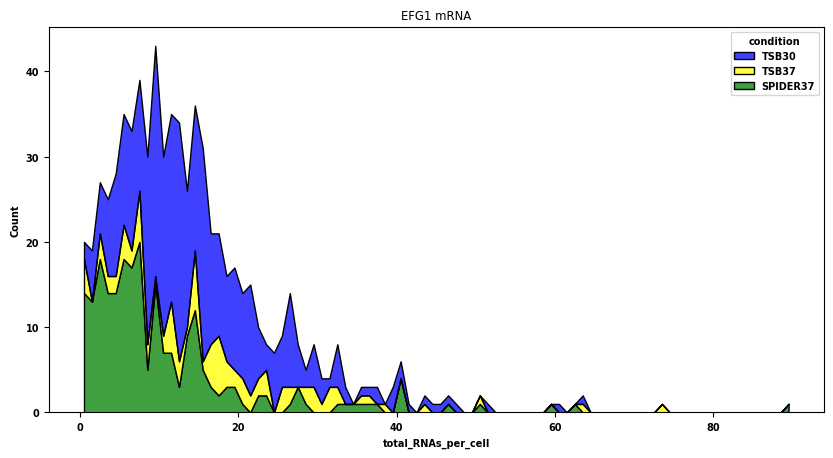

In [20]:
figure,ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(
    data=df[(df['channel']=='CY5') & (df['mRNA']=='EFG1Q670')], x='total_RNAs_per_cell',multiple="stack",hue='condition',hue_order=['TSB30', 'TSB37', 'SPIDER37'], binwidth=1, ax=ax ,palette=['blue','yellow', 'green'], 
    element="poly")

ax.set_title('EFG1 mRNA')  

#plt.savefig('FV_EFG1Q670_polyplot1.svg')


Text(0.5, 1.0, 'HWP1 mRNA')

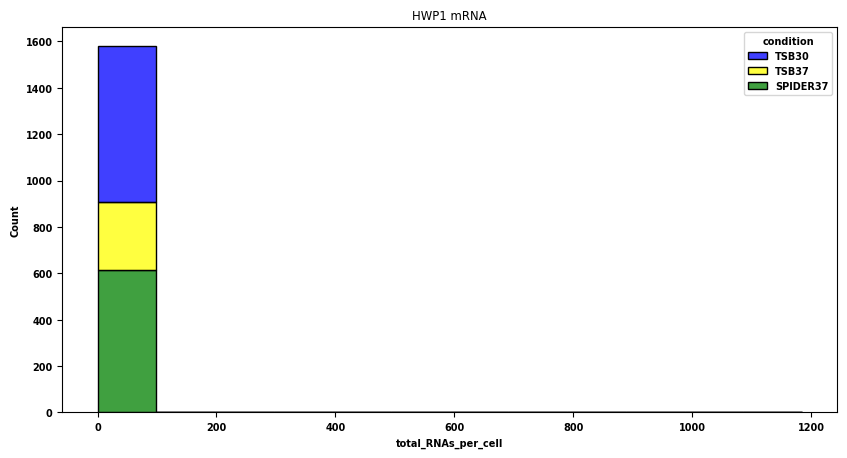

In [21]:
figure, ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(data=df[(df['channel']=='CY35')& (df['mRNA']=='HWP1CAL610')],
                x='total_RNAs_per_cell',hue='condition',hue_order=['TSB30', 'TSB37', 'SPIDER37'], ax=ax,multiple="stack", palette=['blue','yellow', 'green'])
#ax.set_xlim(0,8)
ax.set_title('HWP1 mRNA')

#plt.savefig('FV_HWP1CAL610_histplot2.svg')

Text(0.5, 1.0, 'HWP1 mRNA')

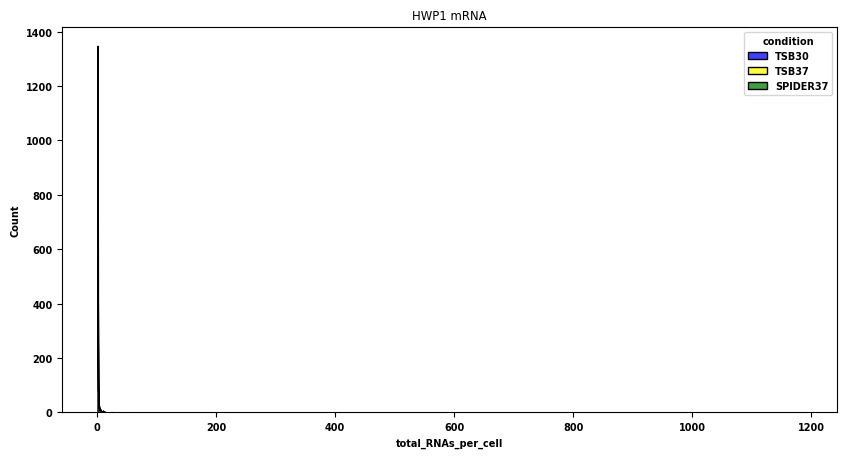

In [22]:
figure,ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(
    data=df[(df['channel']=='CY35')& (df['mRNA']=='HWP1CAL610')], x='total_RNAs_per_cell',multiple="stack",hue='condition',hue_order=['TSB30', 'TSB37', 'SPIDER37'], binwidth=1, ax=ax ,palette=['blue','yellow', 'green'], 
    element="poly")

ax.set_title('HWP1 mRNA')  

#plt.savefig('FV_CLB2Q670_polyplot1.svg')

Text(0.5, 1.0, 'Eccentricity')

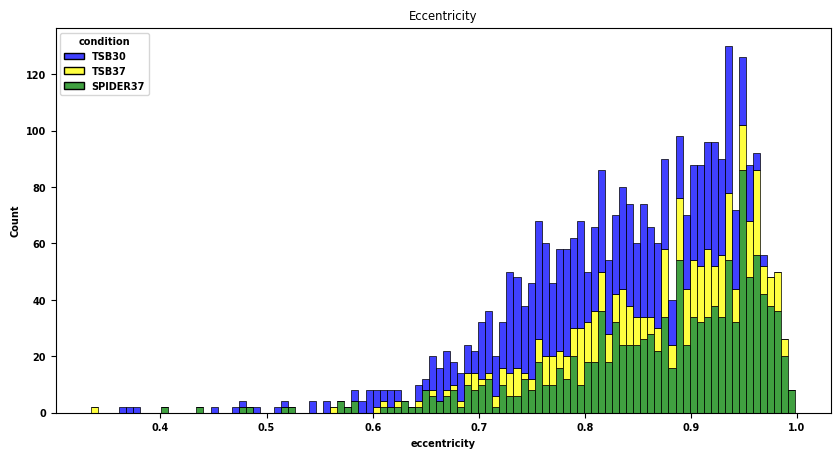

In [23]:
figure,ax= plt.subplots(figsize=(10,5))
ax=sns.histplot(data=df, x='eccentricity',hue='condition',hue_order=['TSB30', 'TSB37', 'SPIDER37'] ,bins=100,ax=ax,multiple="stack", palette=['blue','yellow', 'green'])
ax.set_title('Eccentricity' )

#plt.savefig('FV_Eccenticity_histplot.svg')

***

In [24]:
data1=df[(df['condition']=='TSB30') & (df['channel']==   'CY5')& (df['mRNA']=='CLB2Q670') ]
data2=df[(df['condition']=='TSB37') & (df['channel']==   'CY5')& (df['mRNA']=='CLB2Q670') ]
data3=df[(df['condition']=='SPIDER37') & (df['channel']=='CY5')& (df['mRNA']=='CLB2Q670') ]

In [25]:
print(data1['eccentricity'].sum())

218.97776857751904


In [26]:
print(data1['condition'].count())

278


In [27]:
print(data2['eccentricity'].sum())

166.29146452433923


In [28]:
print(data2['condition'].count())

197


In [29]:
print(data3['eccentricity'].sum())

337.455946539034


In [30]:
print(data3['condition'].count())

393


In [31]:
data4=df[(df['condition']=='TSB30') & (df['channel']==   'CY5')& (df['mRNA']=='EFG1Q670') ]
data5=df[(df['condition']=='TSB37') & (df['channel']==   'CY5')& (df['mRNA']=='EFG1Q670') ]
data6=df[(df['condition']=='SPIDER37') & (df['channel']=='CY5')& (df['mRNA']=='EFG1Q670') ]

In [32]:
print(data4['eccentricity'].sum())

328.6282687250478


In [33]:
print(data4['condition'].count())

397


In [34]:
print(data5['eccentricity'].sum())

86.47432299763103


In [35]:
print(data5['condition'].count())

97


In [36]:
print(data6['eccentricity'].sum())

201.2407511437832


In [37]:
print(data6['condition'].count())

227


In [38]:
data7=df[(df['condition']=='TSB30') & (df['channel']==   'CY35')& (df['mRNA']=='HWP1CAL610') ]
data8=df[(df['condition']=='TSB37') & (df['channel']==   'CY35')& (df['mRNA']=='HWP1CAL610') ]
data9=df[(df['condition']=='SPIDER37') & (df['channel']=='CY35')& (df['mRNA']=='HWP1CAL610') ]

In [39]:
print(data7['eccentricity'].sum())

547.6060373025668


In [40]:
print(data7['condition'].count())

675


In [41]:
print(data8['eccentricity'].sum())

252.76578752197028


In [42]:
print(data8['condition'].count())

294


In [43]:
print(data9['eccentricity'].sum())

538.6966976828172


In [44]:
print(data9['condition'].count())

620


## 5.2 - KDEplots mRNA vs eccentricity

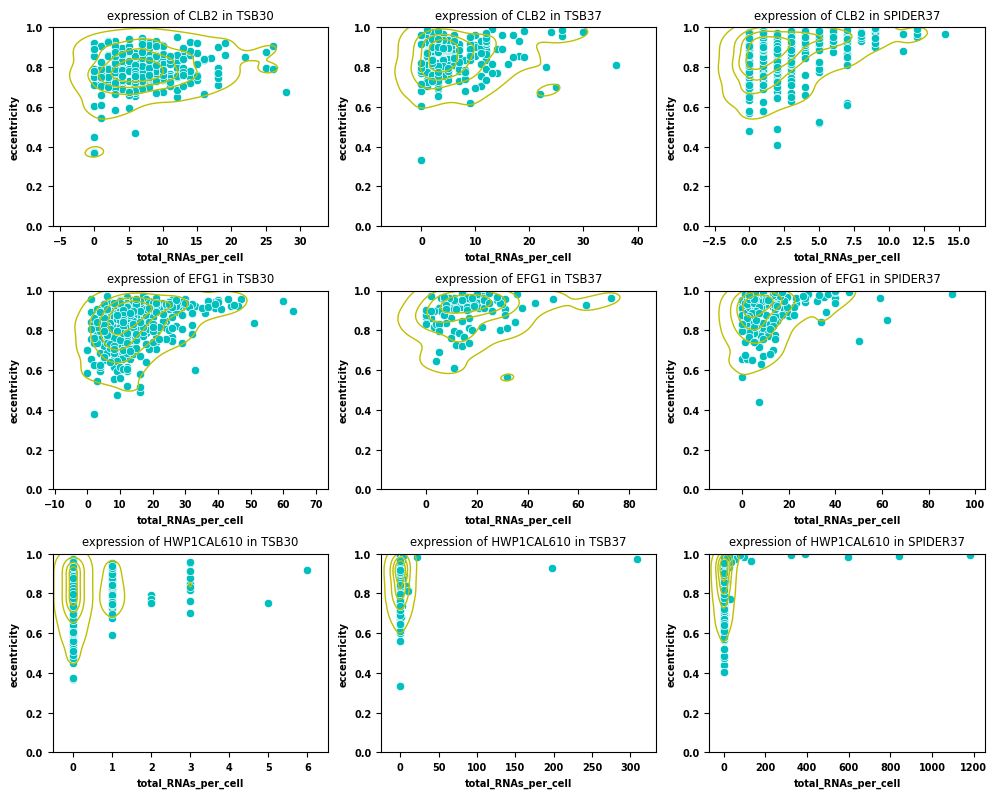

In [45]:

nrows = len(mRNAs)
ncols = len(conditions)

figure, axes= plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,8))
axes = np.array(axes).reshape(nrows, ncols)

for row,mRNA in enumerate(mRNAs):
    for col,condition in enumerate(conditions):
        sns.scatterplot(data=df[(df['mRNA']==mRNA) & (df['condition']==condition) ], x='total_RNAs_per_cell',y='eccentricity',ax=axes[row, col], color='c')
        sns.kdeplot(data=df[(df['mRNA']==mRNA) & (df['condition']==condition)],x='total_RNAs_per_cell',y='eccentricity', levels=5, color= 'y',linewidths=1,ax=axes[row, col])
        #axes[row,col].set_xlim(0,50)
        axes[row,col].set_ylim(0,1)
        
        
        axes[row,col].set_title(f'expression of {mRNA.split("Q")[0]} in {condition}')
        
#plt.savefig(f'scatter_kdeplot_{mRNAs}_in_three_conditions .svg')

plt.tight_layout()

C:\Users\asus5\anaconda3\envs\FISH\lib\site-packages\seaborn\axisgrid.py:1877: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\asus5\anaconda3\envs\FISH\lib\site-packages\seaborn\axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(y=self.y, ax=self.ax_marg_y, **kwargs)
C:\Users\asus5\anaconda3\envs\FISH\lib\site-packages\seaborn\axisgrid.py:1877: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\asus5\anaconda3\envs\FISH\lib\site-packages\seaborn\axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=T

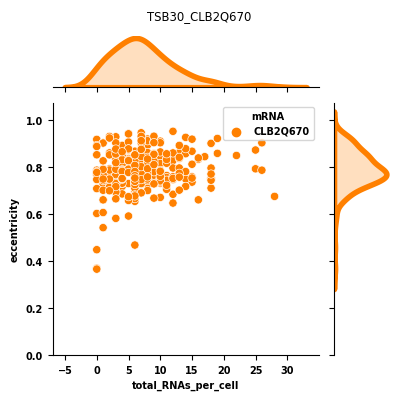

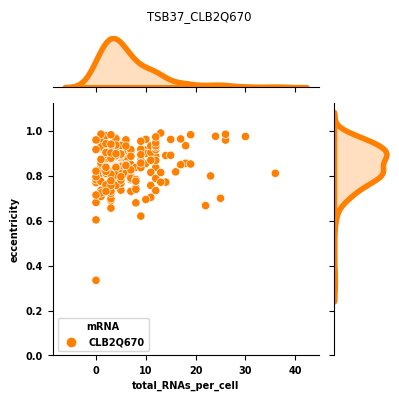

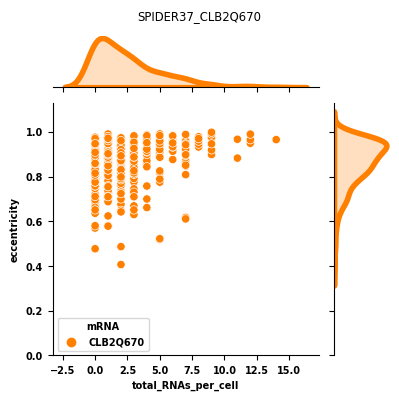

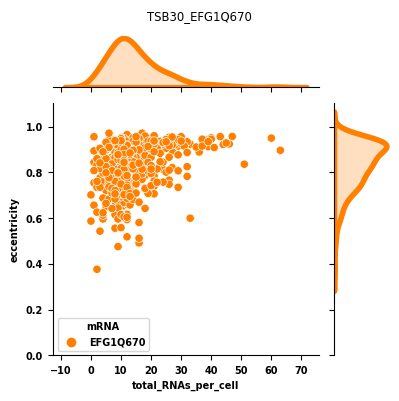

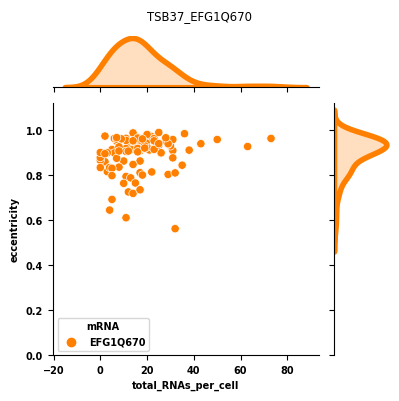

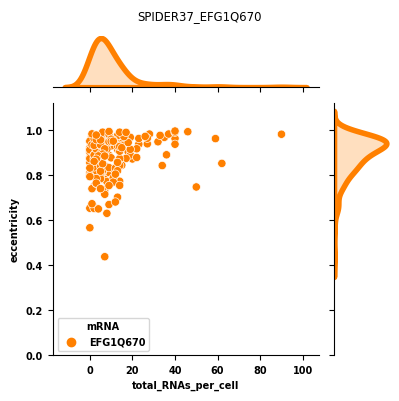

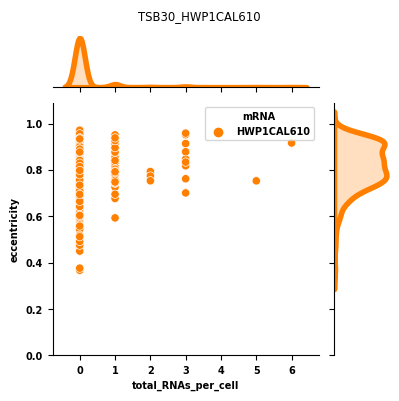

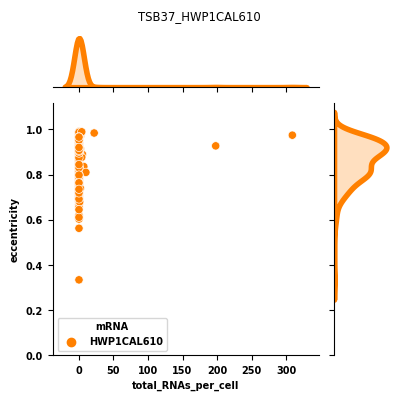

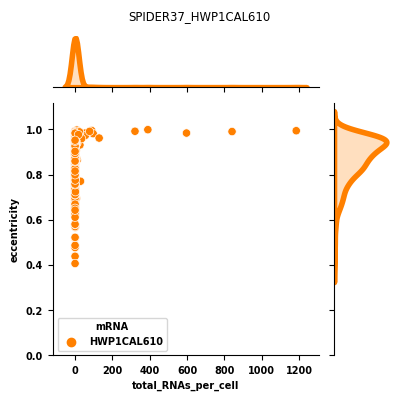

In [46]:
nrows = len(mRNAs)
ncols = len(conditions)

axes = np.array(axes).reshape(nrows, ncols)
for row, mRNA in enumerate(mRNAs):
    for col, condition in enumerate(conditions):

        g=sns.jointplot(data=df[(df['mRNA']==mRNA) & (df['condition']==condition)],x='total_RNAs_per_cell',y='eccentricity', space=0.1, ratio=4, height=4 ,palette='autumn', linewidths=1,hue="mRNA", marginal_kws={'lw': 4, 'shade': True})
        g.ax_joint.set_yticks([x/10 for x in range(0,12,2)])
        plt.suptitle(f'{condition}_{mRNA}')
        plt.tight_layout()
        #plt.savefig(f'fv_jointplot_{mRNA}_{condition}.svg')

***

## 5.3 - Stripplots

<Axes: title={'center': 'spots per cell'}, xlabel='mRNA', ylabel='spots_per_cell'>

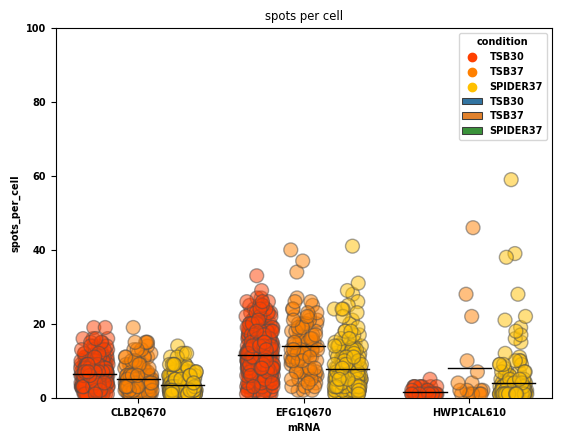

In [47]:
ax = sns.stripplot(
    data=(df[df['spots_per_cell']>0]),
    x="mRNA", 
    y="spots_per_cell", jitter=0.25, 
    orient="v",palette='autumn' ,hue='condition',hue_order=['TSB30', 'TSB37', 'SPIDER37'] ,dodge=True,alpha=0.5, s=10 ,linewidth=1)

ax.set_title('spots per cell')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0,100)

# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="mRNA",
            y="spots_per_cell",
            hue='condition',
            hue_order= ['TSB30','TSB37','SPIDER37'],
            data=df[df['spots_per_cell']>0],
            showfliers=False,
            showbox=False,
            showcaps=False)

#change legend
#plt.legend(title='mRNA', loc='upper right', labels=['CLB2Q670', 'EFG1Q670'],markerscale=5)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#plt.savefig('stripplot_spot_per_cell.svg')

### <span style="color:seagreen"> 5.3.1 - Plotting only expressing cells </span>

<Axes: title={'center': 'total_RNAs_per_cell'}, xlabel='mRNA', ylabel='total_RNAs_per_cell'>

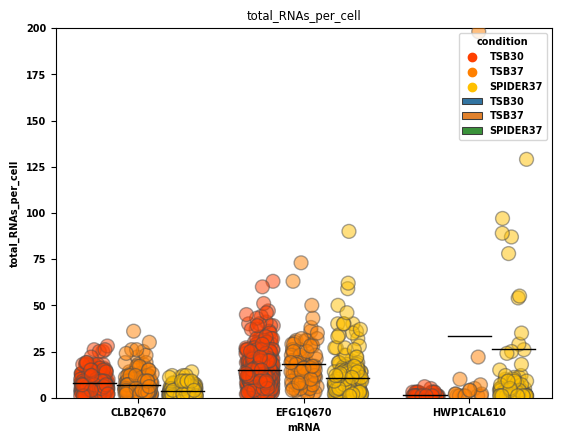

In [48]:
ax = sns.stripplot(
    data=(df[df['total_RNAs_per_cell']>0]),
    x="mRNA", 
    y="total_RNAs_per_cell", jitter=0.25, 
    orient="v",palette='autumn' ,hue='condition',hue_order=['TSB30', 'TSB37', 'SPIDER37'] ,dodge=True,alpha=0.5, s=10 ,linewidth=1)

ax.set_title('total_RNAs_per_cell')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylim(0,200)

# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="mRNA",
            y="total_RNAs_per_cell",
            hue='condition',
            hue_order= ['TSB30','TSB37','SPIDER37'],
            data=df[df['total_RNAs_per_cell']>0],
            showfliers=False,
            showbox=False,
            showcaps=False)

#change legend
#plt.legend(title='mRNA', loc='upper right', labels=['CLB2Q670', 'EFG1Q670'],markerscale=5)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#plt.savefig('stripplot_spot_per_cell.svg')

### <span style="color:seagreen"> 5.3.2 - Plotting nascent mRNA per cell </span>

In [49]:
g1 = df.groupby(['condition'])['condition'].count()
g1

condition
SPIDER37    1240
TSB30       1350
TSB37        588
Name: condition, dtype: int64

<Axes: title={'center': 'nascent RNAs per cell'}, xlabel='mRNA', ylabel='nascent_RNAs'>

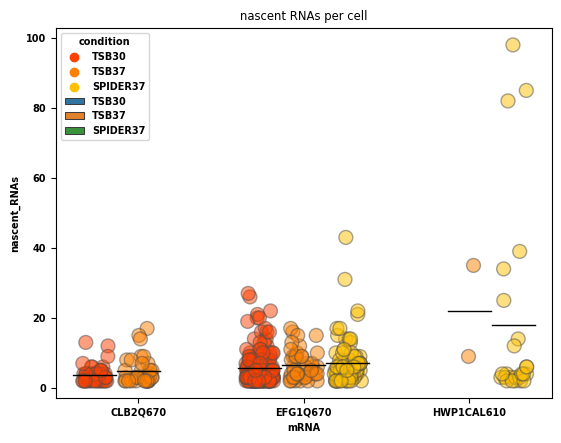

In [50]:
ax=sns.stripplot(
    data=df[df['nascent_RNAs']>0],
    x="mRNA", y="nascent_RNAs", hue="condition" ,  dodge=True, hue_order = ['TSB30','TSB37','SPIDER37'] , jitter=0.25, 
    orient="v",palette='autumn' ,alpha=0.5, s=10 ,linewidth=1)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))'''

ax.set_title('nascent RNAs per cell')
#ax.set_ylim(0,50)

# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="mRNA",
            y="nascent_RNAs",
            data=df[(df['nascent_RNAs']>0)],
            hue='condition',
            hue_order = ['TSB30','TSB37','SPIDER37'],
            showfliers=False,
            showbox=False,
            showcaps=False)

#change legend
#plt.legend(title='mRNA', loc='upper right', labels=['CLB2Q670', 'EFG1Q670'],markerscale=5)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#plt.savefig('FV_nascent_stripplot.svg')